In [1]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install ffmpeg-python

In [3]:
import librosa
import numpy as np
# 列出範例聲音檔案
librosa.util.list_examples()

AVAILABLE EXAMPLES
--------------------------------------------------------------------
brahms    	Brahms - Hungarian Dance #5
choice    	Admiral Bob - Choice (drum+bass)
fishin    	Karissa Hobbs - Let's Go Fishin'
humpback  	Glacier Bay 60-second clip humpback whale song November 2020
libri1    	Ashiel Mystery - A Detective Story, chapter 2, narrated by Garth Comira
libri2    	The Age of Chivalry / Chapter 18: Perceval / Read by Anders Lankford
libri3    	Sense and Sensibility / Chapter 18 / Jane Austen / Read by Heather Barnett
nutcracker	Tchaikovsky - Dance of the Sugar Plum Fairy
pistachio 	The Piano Lady - Pistachio Ice Cream Ragtime
robin     	Bird Whistling, Robin, Single, 13.wav / InspectorJ
sweetwaltz	Setuniman - Sweet Waltz
trumpet   	Mihai Sorohan - Trumpet loop
vibeace   	Kevin MacLeod - Vibe Ace


C:\Users\user\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [4]:
from pydub import AudioSegment
from os import path
src_filename = "01 冬節來府城食「菜包」.mp3"
dst_filename = "01 冬節來府城食「菜包」.wav"
# Open the MP3 file
sound = AudioSegment.from_mp3(src_filename)

# Export the file as WAV
sound.export(dst_filename, format="wav")

<_io.BufferedRandom name='01 冬節來府城食「菜包」.wav'>

In [5]:
# 讀取聲音檔
filename = '01 冬節來府城食「菜包」.wav'
# y：波形資料
# sr：取樣頻率（Hz）
y, sr = librosa.load(filename)

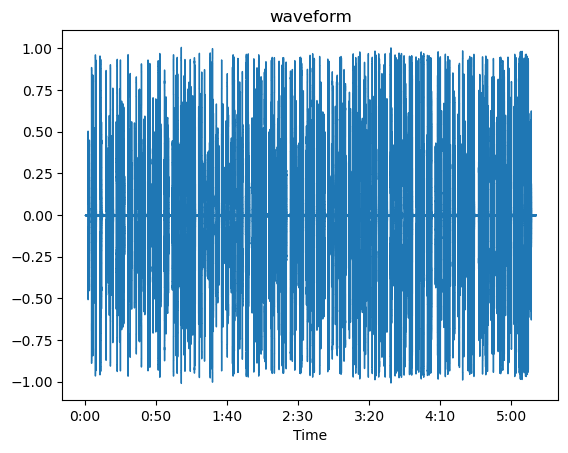

In [6]:
import librosa.display
import matplotlib.pyplot as plt

# 繪製波形圖
plt.figure()
librosa.display.waveshow(y, sr=sr)
plt.title('waveform')
plt.show()

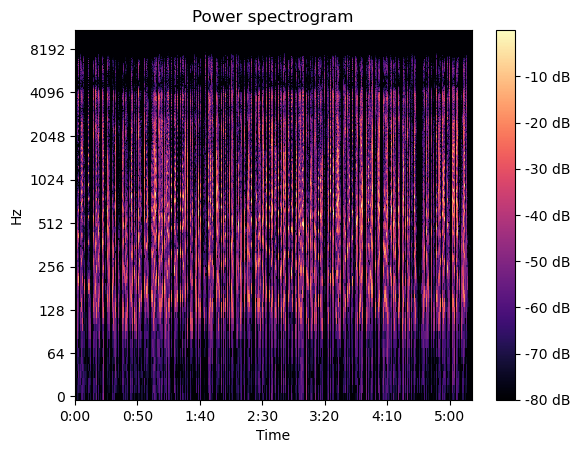

In [7]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# 計算短時距傅立葉變換
S = np.abs(librosa.stft(y))

# 繪製短時距傅立葉變換圖
fig, ax = plt.subplots()
img = librosa.display.specshow(
    librosa.amplitude_to_db(S, ref=np.max),
    y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

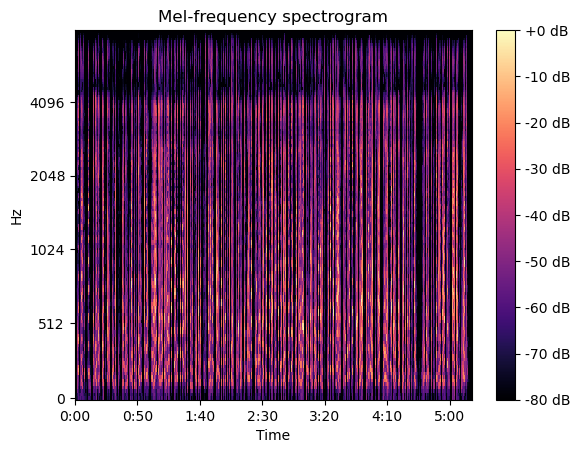

In [8]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# 計算梅爾頻譜
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

# 繪製梅爾頻譜圖
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                               y_axis='mel', sr=sr,
                               fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
plt.show()

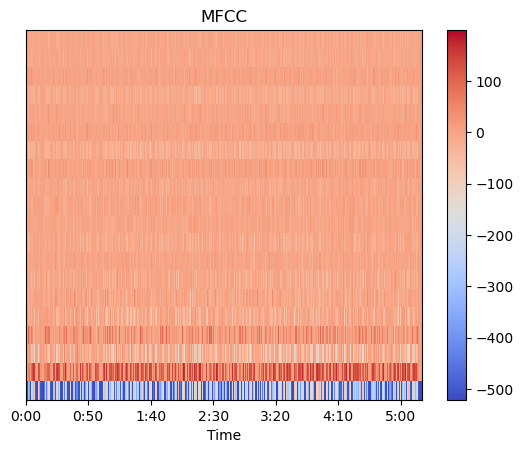

In [9]:
import matplotlib.pyplot as plt

# 計算梅爾頻率倒譜係數
mfccs = librosa.feature.mfcc(y=y, sr=sr)

# 繪製梅爾頻率倒譜係數圖
fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')
plt.show()

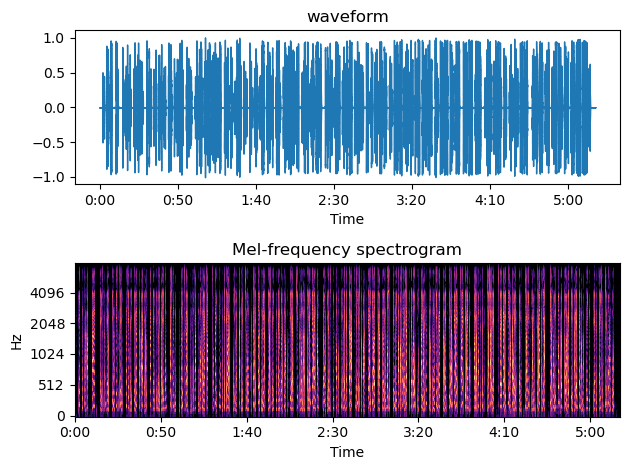

In [10]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1)

# 繪製波形圖
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set_title('waveform')

# 繪製梅爾頻譜圖
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax[1])
ax[1].set_title('Mel-frequency spectrogram')

plt.tight_layout()
plt.show()

In [11]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
# 節奏頻率（次/分鐘）
print(tempo)
# 節拍的 frame 編號
print(beat_frames)

92.28515625
[   54    82   116   144   172   200   228   259   285   318   348   379
   410   441   464   491   518   545   572   599   627   657   686   716
   746   774   802   832   857   882   907   933   956   982  1009  1036
  1062  1088  1114  1139  1164  1190  1215  1241  1267  1293  1320  1346
  1374  1402  1430  1458  1486  1517  1543  1569  1596  1623  1651  1680
  1709  1739  1771  1802  1830  1858  1887  1912  1938  1967  1995  2022
  2050  2076  2099  2124  2149  2174  2207  2233  2256  2285  2312  2339
  2367  2395  2425  2454  2489  2519  2546  2574  2602  2630  2657  2684
  2713  2742  2769  2798  2823  2852  2882  2907  2939  2968  2996  3025
  3053  3081  3108  3134  3161  3188  3216  3246  3273  3301  3328  3354
  3380  3406  3432  3455  3481  3507  3533  3558  3584  3611  3641  3670
  3699  3726  3753  3781  3814  3851  3880  3906  3932  3958  3987  4016
  4045  4072  4099  4126  4160  4189  4216  4244  4272  4300  4327  4354
  4381  4408  4433  4458  4486  4513  4

In [12]:
# 將 frames 轉為實際時間
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

# 節拍的時間點
print(beat_times)

[  1.25387755   1.90403628   2.69351474   3.34367347   3.9938322
   4.64399093   5.29414966   6.01396825   6.61768707   7.38394558
   8.08054422   8.80036281   9.52018141  10.24        10.77405896
  11.40099773  12.02793651  12.65487528  13.28181406  13.90875283
  14.55891156  15.2555102   15.92888889  16.62548753  17.32208617
  17.9722449   18.62240363  19.31900227  19.89950113  20.48
  21.06049887  21.66421769  22.19827664  22.80199546  23.42893424
  24.05587302  24.65959184  25.26331066  25.86702948  26.44752834
  27.02802721  27.63174603  28.2122449   28.81596372  29.41968254
  30.02340136  30.65034014  31.25405896  31.90421769  32.55437642
  33.20453515  33.85469388  34.50485261  35.2246712   35.82839002
  36.43210884  37.05904762  37.68598639  38.33614512  39.00952381
  39.68290249  40.37950113  41.12253968  41.84235828  42.49251701
  43.14267574  43.81605442  44.39655329  45.00027211  45.67365079
  46.32380952  46.9507483   47.60090703  48.20462585  48.73868481
  49.31918367  49